In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.vq import kmeans
from sklearn import preprocessing
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA

%matplotlib inline  

In [2]:
#Import Account Master file
df = pd.read_csv('Data Outputs/buyers_df2.csv', header=0)

#Check the fields for each
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471377 entries, 0 to 471376
Data columns (total 36 columns):
Unnamed: 0                               471377 non-null int64
Unnamed: 0.1                             471377 non-null int64
SubscriberID                             471377 non-null float64
Email Active                             471377 non-null int64
Purch_Recency                            471377 non-null float64
Frequency                                471377 non-null float64
ORDER_VALUE                              471377 non-null float64
ORDER_PRODUCT_QTY                        471377 non-null float64
PD Men                                   471377 non-null float64
Category: Jeans/Pants/Overalls/Shorts    471377 non-null float64
Mens Regular                             471377 non-null float64
Brand JC                                 471377 non-null float64
Brand PG                                 471377 non-null float64
Brand RW                                 471377 no

In [3]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
print(df.head())

   SubscriberID  Email Active  Purch_Recency  Frequency  ORDER_VALUE  \
0    35732064.0             1          170.0        4.0       276.77   
1    35732065.0             1         1256.0        1.0        59.94   
2    35732068.0             1         1253.0        1.0        24.99   
3    35732070.0             1          540.0        2.0       151.81   
4    35732071.0             1         1372.0        1.0        70.97   

   ORDER_PRODUCT_QTY  PD Men  Category: Jeans/Pants/Overalls/Shorts  \
0               11.0    11.0                                   11.0   
1                2.0     2.0                                    2.0   
2                1.0     1.0                                    1.0   
3                7.0     7.0                                    7.0   
4                2.0     2.0                                    2.0   

   Mens Regular  Brand JC      ...        Not Mens Regular  PD Not Men  \
0          11.0       0.0      ...                     0.0        

In [4]:
df = df.set_index('SubscriberID')
print(df.head())

              Email Active  Purch_Recency  Frequency  ORDER_VALUE  \
SubscriberID                                                        
35732064.0               1          170.0        4.0       276.77   
35732065.0               1         1256.0        1.0        59.94   
35732068.0               1         1253.0        1.0        24.99   
35732070.0               1          540.0        2.0       151.81   
35732071.0               1         1372.0        1.0        70.97   

              ORDER_PRODUCT_QTY  PD Men  \
SubscriberID                              
35732064.0                 11.0    11.0   
35732065.0                  2.0     2.0   
35732068.0                  1.0     1.0   
35732070.0                  7.0     7.0   
35732071.0                  2.0     2.0   

              Category: Jeans/Pants/Overalls/Shorts  Mens Regular  Brand JC  \
SubscriberID                                                                  
35732064.0                                     11.0     

In [5]:
#Store features in an array
X = np.array(df)
header = df.columns

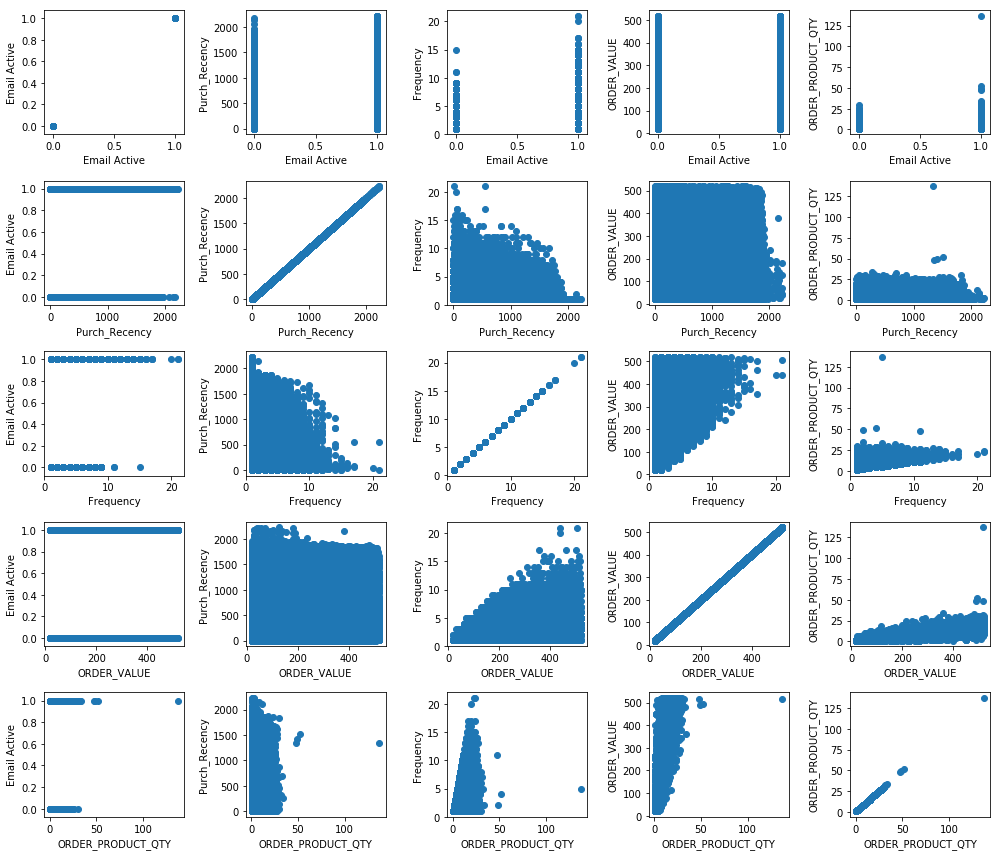

In [6]:
fig = plt.figure(figsize=(14, 12))
feat_comb_1 = [0, 1, 2, 3, 4]
feat_comb_2 = [0, 1, 2, 3, 4]

# This next line was alluded to above, it essentially gives the
# transpose of `X`.


nfeat = len(feat_comb_1)

for a,j in enumerate(feat_comb_1):
    for b,k in enumerate(feat_comb_2):
        # `subplot` takes 3 arguments. If the final plot is going to
        # be 4 subplots × 4 subplots for example, both of these arguments
        # must be equal to 4. The third argument should be incremented
        # sequentially and matplotlib will then decide, for example that
        # in the case of a 5×5 matrix of plots, the 9th plot should be
        # in the 4th plot on the second row.
        plt.subplot(nfeat, nfeat, b + 1 + a * nfeat)
        plt.scatter(X[:, j], X[:, k])
        plt.xlabel(header[j])
        plt.ylabel(header[k])
        fig.tight_layout()

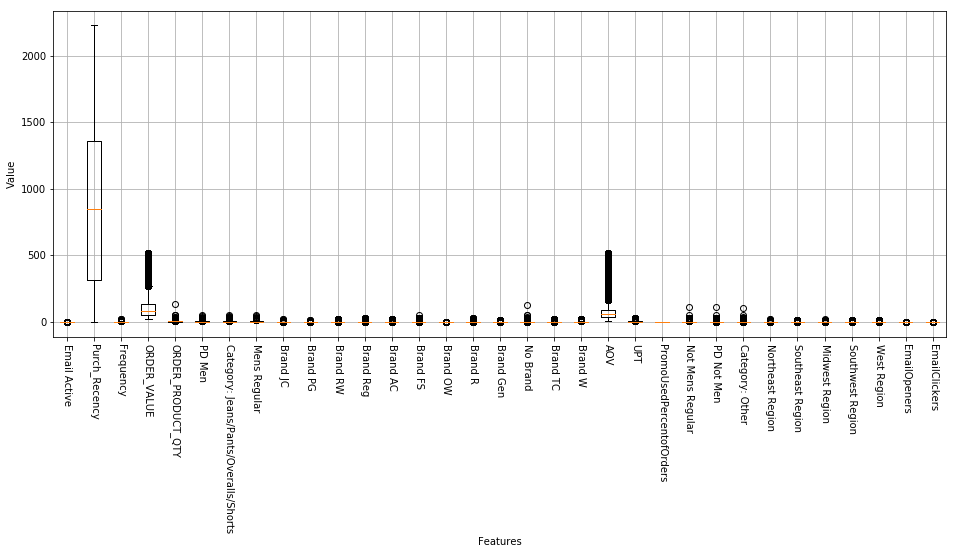

In [7]:
fig, axes = plt.subplots(figsize=(16, 6))
bp = plt.boxplot(X)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='o')
plt.xlabel('Features')
plt.ylabel('Value')
axes.set_xticklabels(header, rotation=270)
plt.grid()

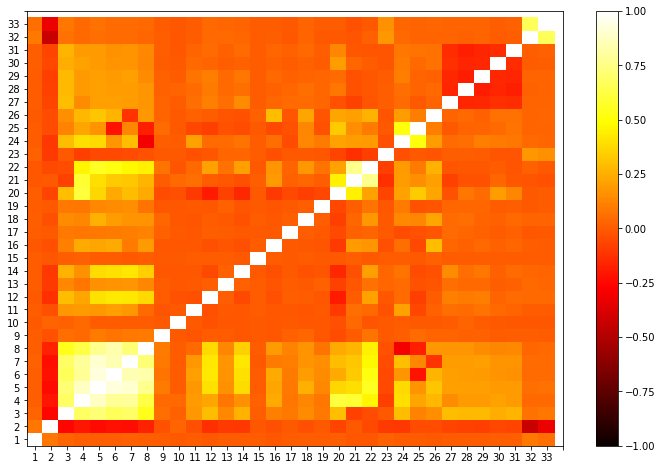

In [12]:
fig = plt.figure(figsize=(12, 8))
correlation_matrix = np.corrcoef(X, rowvar=0)

# A nice way to visualise the correlations matrix is to make a
# scatterplot and rather than write values, assign a color map.
plt.pcolor(correlation_matrix, cmap='hot', vmin=-1, vmax=1)
plt.colorbar()

# Put the major ticks at the middle of each cell.
plt.yticks(np.arange(0.5, 34), range(1, 34))
plt.xticks(np.arange(0.5, 34), range(1, 34))

plt.show()

In [9]:
#Scale the data
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

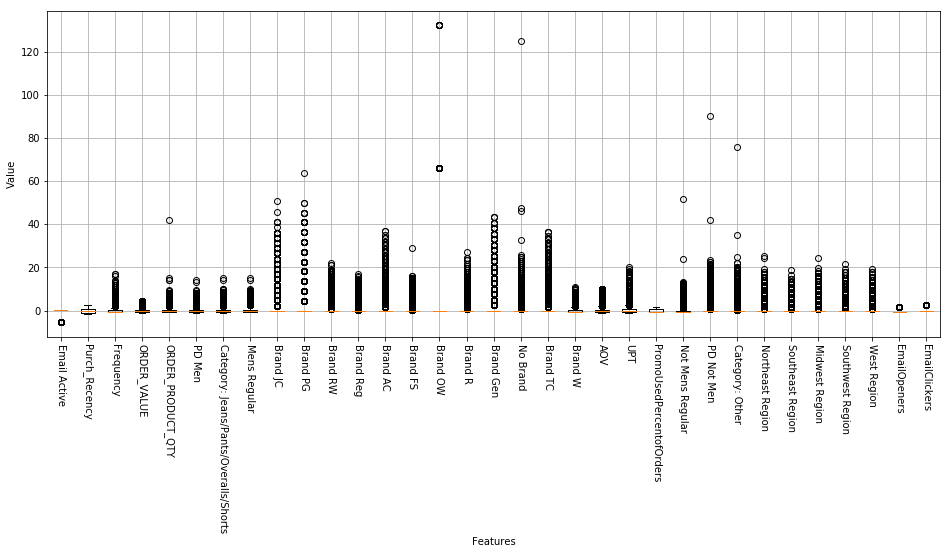

In [13]:
fig, axes = plt.subplots(figsize=(16, 6))
bp = plt.boxplot(X_scaled)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='o')
plt.xlabel('Features')
plt.ylabel('Value')
axes.set_xticklabels(header, rotation=270)
plt.grid()

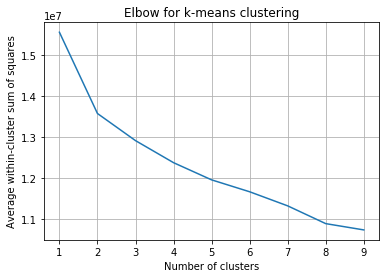

In [14]:
#Elbow Curve for Finding Optimal k
cluster_averaged_distances = []

for K in range(1, 10):
    clf = KMeans(n_clusters=K, init='k-means++')
    clf.fit(X_scaled)
    
    cluster_averaged_distances.append(clf.inertia_)
               
plt.plot(range(1, 10), cluster_averaged_distances)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for k-means clustering')  
plt.show()


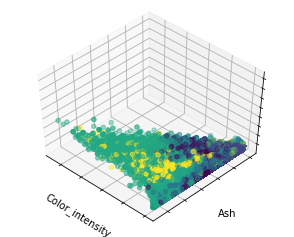

In [15]:
#Mini Batch Kmeans
clf = MiniBatchKMeans(n_clusters=6, init='k-means++')
clf.fit(X_scaled)
labels = clf.labels_

fig = plt.figure(figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X_scaled[:, 10], X_scaled[:, 3], X_scaled[:, 5],
           c=labels.astype(np.float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Color_intensity')
ax.set_ylabel('Ash')
ax.set_zlabel('Magnesium')
plt.show()

In [16]:
clf = KMeans(n_clusters=6, init='k-means++')
# The fit method in scikit-learn tends to be the one that
# takes an n×m array as its input.
clf.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

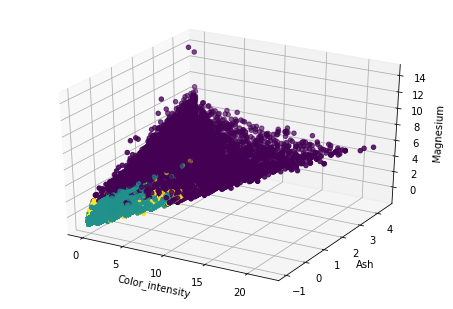

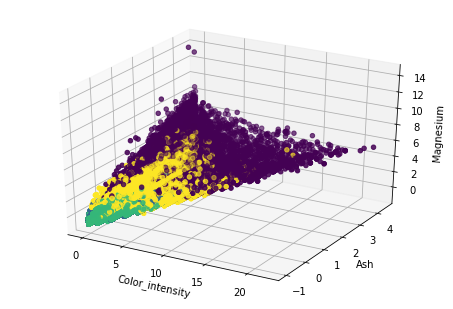

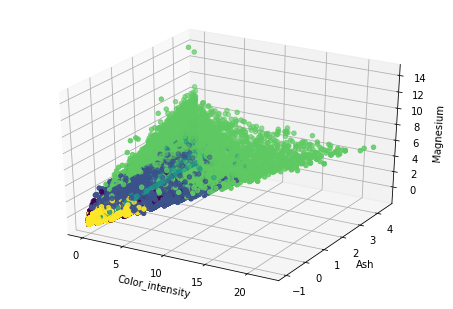

In [17]:
#Visualize the data

for i in range(3,6):
    clf = KMeans(n_clusters=i)

    clf.fit(X_scaled)

    labels = clf.predict(X_scaled)

    fig = plt.figure(i-2)
    ax = Axes3D(fig)
    ax.scatter(X_scaled[:,10], X_scaled[:,3], X_scaled[:, 5], zdir='z', s=20, c=labels, depthshade=True)
    ax.set_xlabel('Color_intensity')
    ax.set_ylabel('Ash')
    ax.set_zlabel('Magnesium')

    plt.show()

In [18]:
nrow, ncol = X_scaled.shape

print(nrow)
print(ncol)

471377
33


In [19]:
#PCA
desired_components=3 # project from 32 to 3 dimensions. What this means, is that we select the 3 dimensions of highest variance
pca = PCA(n_components = desired_components)
Xscores = pca.fit(X_scaled).transform(X_scaled)

# We can verify the number of principal components in this case
Xscores.shape

(471377, 3)

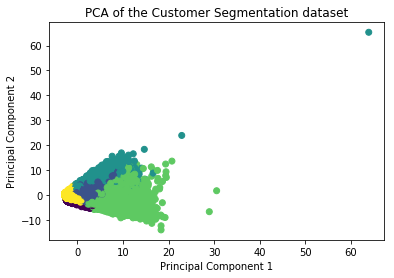

In [20]:
#Plot first two Principal Components using the PC scores

principle_component_data=[Xscores[:,i] for i in range(desired_components)]

plt.scatter(principle_component_data[0],principle_component_data[1],c=labels)
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Customer Segmentation dataset')
plt.show()

[]

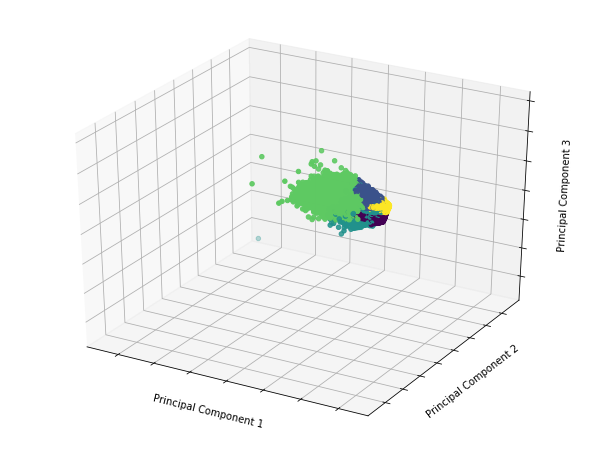

In [21]:
#PCA 3D

fig = plt.figure(figsize=(8,6))

ax = Axes3D(fig, elev=-150, azim=60)#play with the viewing angle by changing these numbers
ax.scatter(principle_component_data[0], principle_component_data[1], principle_component_data[2], c=labels)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.w_zaxis.set_ticklabels([])

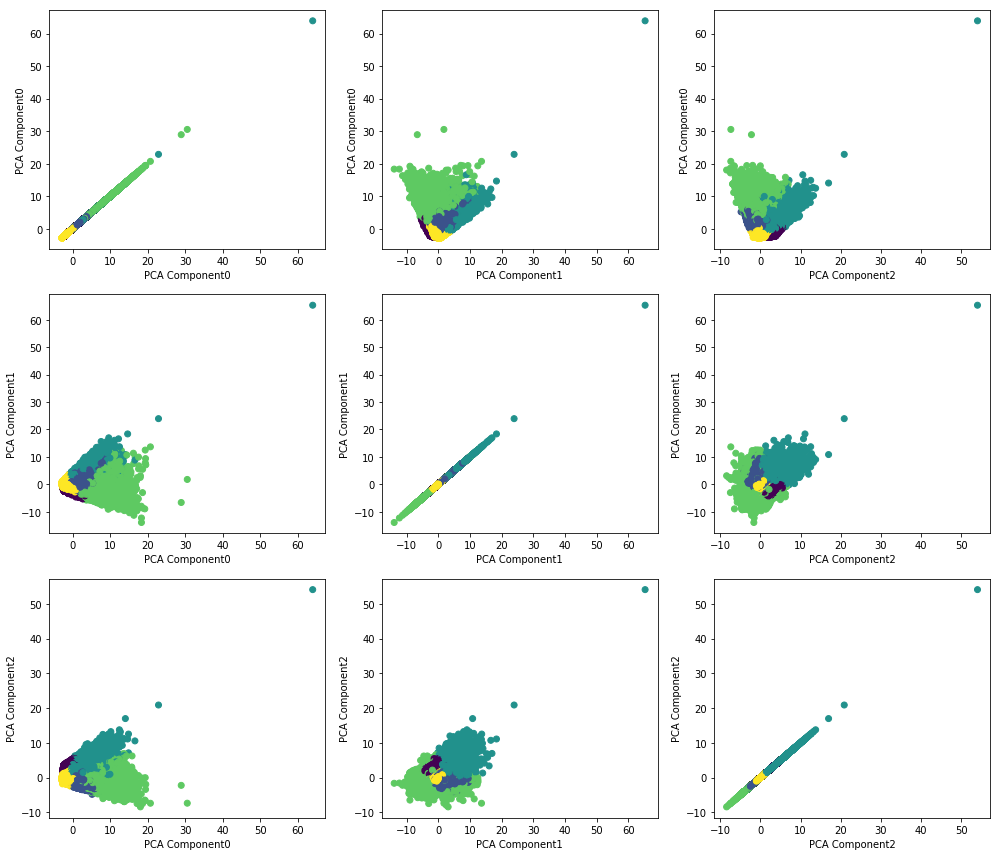

In [22]:
fig = plt.figure(figsize=(14,12))

for j in range(desired_components):
    for k in range(desired_components):
        plt.subplot(desired_components, desired_components, j+1+k*desired_components)
        plt.scatter(principle_component_data[j], principle_component_data[k], c=labels)
        plt.xlabel("PCA Component%d"%j)
        plt.ylabel("PCA Component%d"%k)
fig.tight_layout()

In [23]:
pca = PCA().fit(X_scaled)
pca.explained_variance_ratio_

array([  1.92717690e-01,   7.01546237e-02,   6.20806663e-02,
         5.14922434e-02,   4.04975270e-02,   3.87241981e-02,
         3.65708975e-02,   3.58447166e-02,   3.47689482e-02,
         3.35899076e-02,   3.23928471e-02,   3.18430575e-02,
         3.15285348e-02,   3.04802713e-02,   3.02898233e-02,
         3.01734247e-02,   3.00781853e-02,   2.94533554e-02,
         2.91919829e-02,   2.72516875e-02,   2.70091639e-02,
         2.12495937e-02,   1.89308563e-02,   1.44255786e-02,
         9.48820722e-03,   5.68470903e-03,   3.43601997e-03,
         6.51282950e-04,   1.32119200e-30,   4.28922187e-31,
         8.33023937e-32,   2.08115629e-32,   6.76150337e-33])

C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


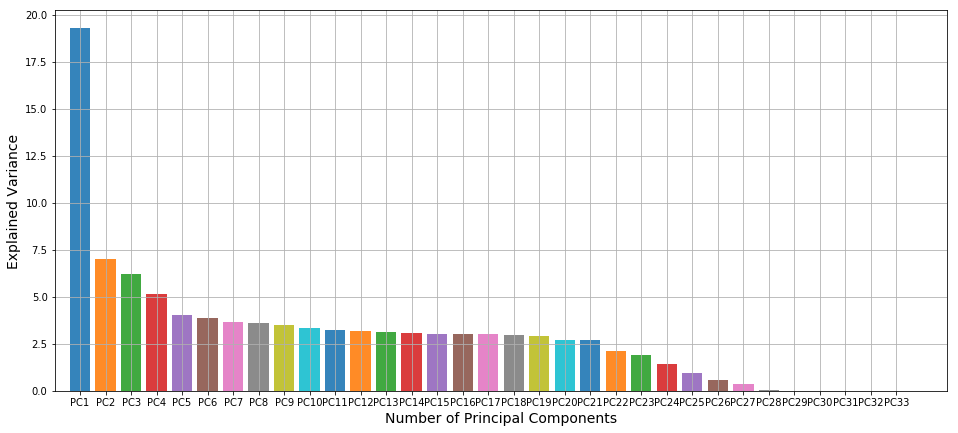

In [24]:
fig = plt.figure(figsize=(16,7))

bar_labels = ['PC%s' %i for i in range(1,ncol+1)]
#bar_labels
x_pos = list(range(len(bar_labels)))
for i in range(ncol):
    plt.bar(left=i, height=pca.explained_variance_ratio_[i]*100, align='center', alpha=0.9)
plt.xticks(x_pos, bar_labels)
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.xlim(-1, 34)
plt.grid()

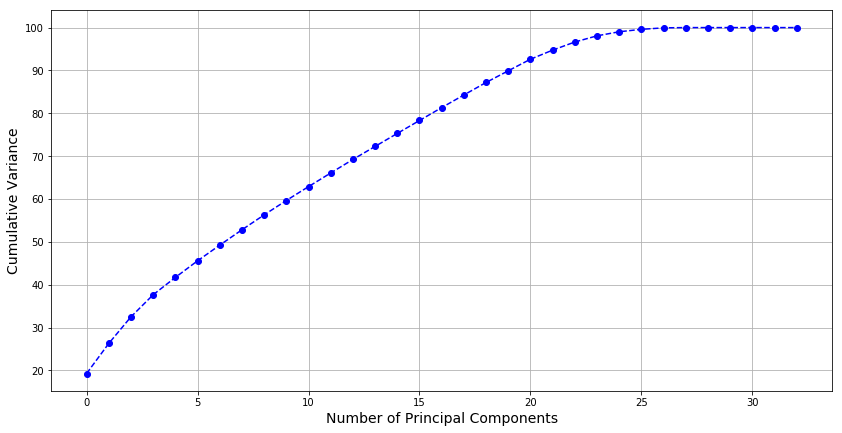

In [25]:
fig = plt.figure(figsize=(14,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_*100), '--bo')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Variance', fontsize=14)
plt.grid()